In [22]:
%matplotlib inline
from fastai.basics import *

#  Linear Regression problem

In [23]:
n=100

Create a pytorch matrix with `n` rows and 2 columns.

In [24]:
x = torch.ones(n, 2)

Set the first column of the matrix above to a uniformly distributed set of values between -1 and 1. Do this operation in-place. 

In [25]:
x[:,0].uniform_(-1.,1)

tensor([-0.0606, -0.7819, -0.6407, -0.9228, -0.9082,  0.3214, -0.0510, -0.3470,
         0.5960, -0.5857,  0.8023,  0.0068,  0.7386, -0.3904, -0.5164,  0.3736,
        -0.3005,  0.2186,  0.8478, -0.3678,  0.9128, -0.1024, -0.7770, -0.6564,
        -0.9015,  0.6895, -0.8523, -0.3522, -0.6554, -0.8022, -0.3623,  0.5426,
        -0.4582, -0.5161, -0.3639,  0.8796, -0.2596, -0.0616,  0.9060,  0.2272,
        -0.7726, -0.5693, -0.5265, -0.5519,  0.8011, -0.0378,  0.6454,  0.9420,
        -0.9533,  0.6539,  0.0847, -0.0070, -0.8318, -0.1146,  0.4395, -0.4854,
         0.4097, -0.8180,  0.0291, -0.7359,  0.2303, -0.0693, -0.1109, -0.3464,
        -0.4009, -0.2752,  0.7817, -0.3911,  0.2274,  0.3584, -0.8006,  0.5420,
         0.2400, -0.6183,  0.8255,  0.4398,  0.3687, -0.1258,  0.6223,  0.6526,
         0.0716, -0.5729, -0.5263,  0.2846, -0.1756, -0.4983,  0.1496, -0.5313,
         0.4377,  0.5455, -0.7682,  0.6021,  0.6105, -0.6616, -0.5377, -0.2288,
         0.9074, -0.9785,  0.0809, -0.73

Create a 1d vector with values [3, 2] and name it `a`.

In [26]:
a = torch.tensor([3., 2])

Create a series of random points by matrix-multiplying the matrix `x` from above by `a`, and adding a random float between 0 and 1 to it. (Hint: `torch.rand` will give you floats between 0 and 1). Name these random points `y`.

In [27]:
y = x@a + torch.rand(n)

Scatter-plot the first column of `x` against `y`.

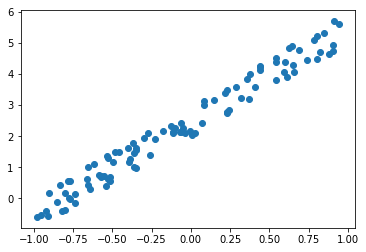

In [28]:
plt.scatter(x[:,0], y)

Define a function `mse` that takes two vectors, `y_hat` (a series of predictions) and `y` (a series of ground truth values) and computes the mean squared error.

In [29]:
def mse(y_hat, y): return ((y_hat - y)**2).mean()

Calculate the `mse` if we guessed (-1, 1) for vector `a`.

In [54]:
a = torch.tensor([-1., 1])

In [35]:
mse(x@a, y)

tensor(6.6058)

Plot the scatter of ground truth values (in blue) and the predicted points (in orange).

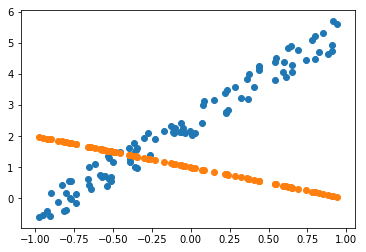

In [36]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], x@a)

# Gradient Descent

Turn the vector `a` into an optimizable parameter (Hint: `nn.Parameter`)

In [55]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

Write a function `update` that:
* Calculates the loss at the current value of `a`
* Computes the gradient of the loss with respect to `a`
* Update the grads

Hint: don't forget to zero out the gradients.

In [56]:
def update(i):
    loss = mse(x@a, y)
    loss.backward()
    if i % 10 == 0: print(loss) 
    with torch.no_grad(): 
        a.sub_(a.grad * lr)
        a.grad.zero_()

With a learning rate of 1e-1, run 100 iterations of `update`.

In [57]:
lr = 1e-1
for i in range(100): update(i)

tensor(6.6058, grad_fn=<MeanBackward1>)
tensor(1.5892, grad_fn=<MeanBackward1>)
tensor(0.5021, grad_fn=<MeanBackward1>)
tensor(0.2086, grad_fn=<MeanBackward1>)
tensor(0.1285, grad_fn=<MeanBackward1>)
tensor(0.1066, grad_fn=<MeanBackward1>)
tensor(0.1007, grad_fn=<MeanBackward1>)
tensor(0.0991, grad_fn=<MeanBackward1>)
tensor(0.0986, grad_fn=<MeanBackward1>)
tensor(0.0985, grad_fn=<MeanBackward1>)


Once again, plot `x` against the predictions using the parameter vector `a`.

## Animate it!

In [69]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

Reinitialize the variable `a` to the vector [-1, 1].

In [71]:
a = nn.Parameter(torch.tensor([-1., 1]))

Create a matplotlib figure with a scatter plot of the first column of `x` and `y`. 

Create a line with the first column of `x` plotted against a prediction vector `y_hat`. (Hint: then close the `plt` object)

Define a function `animate` that:
* Takes an integer `i` as argument (though never uses it)
* Updates the parameter vector `a`
* Sets the y data for the line created above to the new predicted line using the new `a` parameter vector
* Returns a tuple of the line and `None`

Call `animation.FuncAnimation` that animates the line created above over 100 iterations.

In [80]:
fig = plt.figure()
plt.scatter(x[:,0], y)
line, = plt.plot(x[:,0], x@a, color="orange")
plt.close()

def animate(i):
    update(i)
    line.set_ydata(x@a)
    return line,

from matplotlib import animation
a = nn.Parameter(torch.tensor([-1.,1]))
animation.FuncAnimation(fig, animate, np.arange(100), interval=20)

tensor(6.6058, grad_fn=<MeanBackward1>)
tensor(5.5509, grad_fn=<MeanBackward1>)
tensor(1.4048, grad_fn=<MeanBackward1>)
tensor(0.4529, grad_fn=<MeanBackward1>)
tensor(0.1952, grad_fn=<MeanBackward1>)
tensor(0.1248, grad_fn=<MeanBackward1>)
tensor(0.1056, grad_fn=<MeanBackward1>)
tensor(0.1004, grad_fn=<MeanBackward1>)
tensor(0.0990, grad_fn=<MeanBackward1>)
tensor(0.0986, grad_fn=<MeanBackward1>)
tensor(0.0985, grad_fn=<MeanBackward1>)


## Vocab

- Learning rate
    - The number that we multiply the gradient by before we subtract it from the current value of the parameter
- Epoch
    - A full pass through the training data
- Minibatch
    - A subset of the data on which a gradient update is performed
- SGD
    - Stochastic Gradient Descent -- an algorithm used to optimize a set of parameters to minimize some objective function
- Model / Architecture
    - The function producing a prediction for which we want to optimize some parameters
- Parameters
    - Some variables that we don't know the "best" numbers for in order to minimize (or maximize) some function
- Loss function
    - A measurement of how "off" our prediction is for a given example

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.